In [ ]:
# load processing functions
from source.toolkit import list_channels
from source.toolkit import load_zoo
from source.toolkit import list_channels_df

# load main class object for monitoring blood cells
from source.SickleML_Monitor import CountAdheredBloodCells 


In [ ]:
%%time 

'load model'

#K.clear_session()
# path that contains the folders for the pretrained weights folders
working_path = 'C:/Users/npral/OneDrive/Desktop/SCD_project/SCD-ML_general-tool'
Phase1_path = working_path + '/pretrained-weights/Training-Phase1/model/' # folder for Phase I 
Phase2_path = working_path + '/pretrained-weights/Training-Phase2/model/' # folder for Phase II
#Phase2_path = working_path + '/Phase 2/'
# folder for Phase II

Phase1_ensemble = load_zoo(Phase1_path) # loading the Phase I ensemble (expect: 7)
Phase2_ensemble = load_zoo(Phase2_path) # loading the Phase I ensemble (expect: 5)

In [3]:
'channel images'

# folder path that contains all of p-selectin images
path= 'C:/Users/npral/OneDrive/Desktop/SCD_project/SCD-ML_general-tool/protein-channel-data/'
channel_filenames = list_channels_df(path + 'Laminin_cnts-Resnet50.csv')
channel_path = path + 'Laminin/Images/'
channel_filenames  = channel_filenames + '.jpg'

In [4]:
import pandas as pd
pd.read_csv(path + 'Laminin_cnts-Resnet50.csv').filename[12]

'36 Normoxia Count 505'

In [5]:
%%time 

'end to end pipeline (Phase 1 + Phase 2)'


counts = [] 

rbc_thres = [0.4]
wbc_thres = [0.7]
other_thres = [0.9]

for index, filenames in enumerate(channel_filenames[12:13]):
    print('Analysis:', index, '| Channel:', filenames.replace('.png',''))
    print('==================================================================')
    channel = CountAdheredBloodCells(channel_path, filenames) # calling the class object
    # calling the function to output cell counts
    sRBC, WBC, Others, img_container, sRBC_container, WBC_container, Other_container = channel.call_pipeline(Phase1_ensemble, Phase2_ensemble, rbc_thres, wbc_thres, other_thres)

    counts.append([filenames, sRBC, WBC, Others])

Analysis: 0 | Channel: 36 Normoxia Count 505.jpg
Prepare the Phase I data ...
Total of number of extract tiles:  3500
Complete ...
Implementing Phase I ...
Complete ...
Prepare Phase II data ...
Complete ...
Implementing Phase II ...
Complete ...

Wall time: 13min 14s


In [22]:
# Number of counts

counts_df = pd.DataFrame(counts)
counts_df.columns = ['filename', 'sRBC', 'WBC', 'Other']
counts_df.head()


,filename,sRBC,WBC,Other
0,36 Normoxia Count 505.jpg,493,0,86


## Collect individual sickle RBCs: 

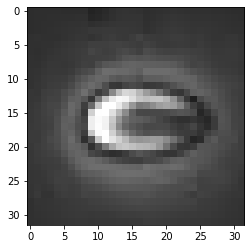

In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

sRBC_images = np.zeros((len(sRBC_container), 32, 32, 3))
for ii, sample in enumerate(sRBC_container): 
    sRBC_images[ii,:,:,:] = img_container[sample]

# example
plt.imshow(sRBC_images[42,:,:,:].astype('int'))